In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df_reg = pd.read_csv("house_prices_train.csv")

In [3]:
df_reg = df_reg.select_dtypes(include=np.number)
df_reg = df_reg.dropna()

In [4]:
X = df_reg.drop("SalePrice", axis=1)
y = df_reg["SalePrice"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

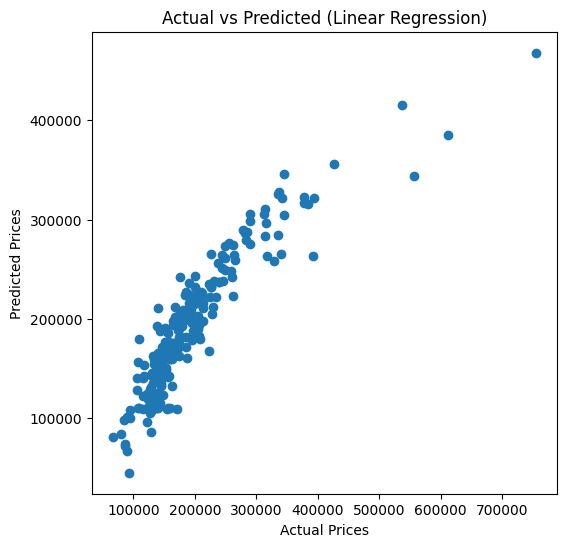

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

PART 2 : REGRESSION METRICS

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 23643.51169437096
MSE: 1591724600.576844
RMSE: 39896.42340582479


CLASSIFICATION

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("train.csv")

In [12]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df['Age'].fillna(df['Age'].median(), inplace=True)

df = pd.get_dummies(df, drop_first=True)

/tmp/ipython-input-2605210100.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [13]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Logistic Regression

In [15]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

Naive Bayes

In [16]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

KNN (3 values of k)

In [17]:
for k in [3, 5, 11]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_knn)
    print(f"K={k}, Accuracy={acc}")

K=3, Accuracy=0.6703910614525139
K=5, Accuracy=0.6759776536312849
K=11, Accuracy=0.7262569832402235


CLASSIFICATION METRICS

In [18]:
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_log))

print("\nConfusion Matrix:\n",
      confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[90 15]
 [20 54]]


MODEL BEHAVIOR

In [19]:
knn_simple = KNeighborsClassifier(n_neighbors=50)
knn_simple.fit(X_train, y_train)

print("Train Accuracy:",
      accuracy_score(y_train, knn_simple.predict(X_train)))
print("Test Accuracy:",
      accuracy_score(y_test, knn_simple.predict(X_test)))

Train Accuracy: 0.6882022471910112
Test Accuracy: 0.6927374301675978


Overfitting Example

In [20]:
knn_complex = KNeighborsClassifier(n_neighbors=1)
knn_complex.fit(X_train, y_train)

print("Train Accuracy:",
      accuracy_score(y_train, knn_complex.predict(X_train)))
print("Test Accuracy:",
      accuracy_score(y_test, knn_complex.predict(X_test)))

Train Accuracy: 0.9620786516853933
Test Accuracy: 0.6536312849162011


Low bias, high variance → training accuracy very high, testing lower.

Underfitting → Model too simple, cannot capture pattern

Overfitting → Model memorizes training data

Good model → Balanced train & test accuracy

Bias & Variance

1. What is Bias?

Error due to overly simple assumptions in the model.

2. What is Variance?

Error due to model being too sensitive to training data.

3. Relationship?

High bias → underfitting

High variance → overfitting

4. How to reduce overfitting?

More data

Regularization

Cross-validation

Simpler model

Feature selection